#### he combinado dos notebooks, he añadido notebook de tutorial de scraping actualiazado a esta.

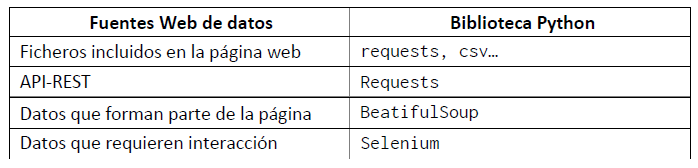

URLs

#### schema:[//[user[:passwd]@]host[:port]][/path][?query][#tag]



En esta URL, el esquema viene dado por el protocolo https, la autoridad
corresponde con es.wikipedia.org (no hay usuario ni palabra clave) y la ruta es la
cadena wiki/Alan_Turing. La URI no contiene consultas, pero s� una etiqueta final,
tras el s�mbolo �#�: Turing_en_el_cine.

In [3]:
import os
import requests

# Definir la URL y el directorio de destino
url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"
directory = r'C:\Users\CursosTardes\Desktop\Olga GG\Modulo_5_P\PythonGH\IT-Automation-with-Python\Test'
file_path = os.path.join(directory, 'horario.txt')

# Asegurarse de que el directorio existe
os.makedirs(directory, exist_ok=True)

try:
    # Descargar el archivo
    resp = requests.get(url)
    if resp.status_code == 200:
        with open(file_path, 'wb') as output:
            output.write(resp.content)
        print(f"Archivo guardado en: {file_path}")
    else:
        print(f"Error al descargar el archivo: {resp.status_code}")
except Exception as e:
    print(f"Ocurri� un error: {e}")


Error al descargar el archivo: 503


#### Analizar datos descargados con csv y matplotlib:

In [ ]:
import csv
import matplotlib.pyplot as plt

path = r'C:\Users\CursosTardes\Desktop\Olga GG\Modulo_5_P\PythonGH\IT-Automation-with-Python\Test'
with open(path + r'\horario.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        # Verificar que la fila tenga al menos 57 columnas
        if len(row) < 57:
            print(f"Fila con longitud inesperada: {row}")
            continue
        
        if (row[0]+row[1]+row[2]=='28079004' and row[3]=='12'):
            plt.title("�xido de nitr�geno: " + row[8] + "/" + row[7] + "/" + row[6])
            hora = 0
            desp = 9
            vs = []
            horas = []
            while hora <= 23:
                if row[desp + 2*hora + 1] == 'V':
                    vs.append(row[desp + 2*hora])
                    horas.append(hora)
                hora += 1
            plt.plot(horas, vs)
            plt.show()


#### Web scraping est�tico con BeautifulSoup:

In [9]:
from bs4 import BeautifulSoup

# Ruta del archivo
url = r'C:\Users\CursosTardes\Desktop\Olga GG\Modulo_5_P\PythonGH\IT-Automation-with-Python\Test\mini.html'

# Crear un archivo HTML de ejemplo si no existe
html_content = '''
<!DOCTYPE html>
<html>
  <head>
    <title>
      Un mini ejemplo
    </title>
  </head>
  <body>
    <div id="date"> Fecha 13/06/2024 </div>
    <div id="content"> Un poco de texto </div>
  </body>
</html>
'''

# Escribir el contenido HTML en el archivo
with open(url, "w") as f:
    f.write(html_content)

# Leer el archivo HTML y procesarlo con BeautifulSoup
with open(url, "r") as f:
    page = f.read()

soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())
print(soup.find("div", id="date").get_text())


<!DOCTYPE html>
<html>
 <head>
  <title>
   Un mini ejemplo
  </title>
 </head>
 <body>
  <div id="date">
   Fecha 13/06/2024
  </div>
  <div id="content">
   Un poco de texto
  </div>
 </body>
</html>

 Fecha 13/06/2024 


#### Web scraping din�mico con Selenium:



# Big Data con Python

#### Rafael Caballero, Enrique Mart�n y Adri�n Riesco. Editorial RC libros

## Cap�tulo 2:  ejemplo  de web scraping. Acceso a los datos del catastro


El prop�sito de este notebook es mostrar como hacer web scraping de datos de una p�gina, en este ejemplo del catastro,  que nos exige introducir previamente datos e interaccionar, en este caso seleccionando pesta�as y pulsando botones.

En particular utilizaremos la biblioteca *Selenium* que nos permite obtener autom�ticamente datos de p�ginas web din�micas. Selenium est� pensado realmente para automatizar pruebas de entornos web, pero a nosotros nos servir� para nuestro prop�sito de hacer web scraping.

En particular, lo que vamos a hacer es arrancar google Chrome y manejarlo autom�ticamente desde Python.



**Preparaci�n**


Para ello necesitamos 3 cosas:

1.- Tener google Chrome

2.- Instalar la biblioteca selenium (pip install selenium)

3.- Tener un fichero controlador, un driver, de nombre *chromedriver.exe*.Esto lo vamos a hacer mediante la librer�a chromedriver_autoinstaller


#### Paso 1: abrir navegador
Comenzamos abriendo una sesi�n de Chrome de forma autom�tica


**Importante**
Una vez que logremos que se abra el navegador no debemos teclear nada en �l, ni cerrarlo el control lo llevaremos desde el programa en Python

In [1]:
modules = ["selenium","chromedriver_autoinstaller"]


import sys
import os.path
from subprocess import check_call
import importlib
import os

def instala(modules):
    print("Instalando m�dulos")
    for m in modules:
        # para el import quitamos [...] y ==...
        p = m.find("[")
        mi = m if p==-1 else m[:p]
        p = mi.find("==")
        mi = mi if p==-1 else mi[:p]
        torch_loader = importlib.util.find_spec(mi)
        if torch_loader is not None:
            print(m," encontrado")
        else:
            print(m," No encontrado, instalando...",end="")  
            try:        
                r = check_call([sys.executable, "-m", "pip", "install", "--user",  m])
                print("�hecho!")
            except:
                print("�Problema al instalar ",m,"! �seguro que el m�dulo existe?",sep="")

    print("�Terminado!")

instala(modules) 

Instalando m�dulos
selenium  encontrado
chromedriver_autoinstaller  encontrado
�Terminado!


In [2]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
#chrome_options.add_argument('--headless') # ensure GUI is off
#chrome_options.add_argument('--no-sandbox')
#chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()


# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

### Paso 2: cargar p�gina
Una vez abierto el navegador lo siguiente es cargar la p�gina que deseemos, en este caso la del catastro. Debemos ver c�mo se carga la p�gina correspondiente

In [3]:
url = 'https://www1.sedecatastro.gob.es/CYCBienInmueble/OVCBusqueda.aspx'
driver.get(url)

Es cada vez m�s normal que al cargar la p�gina tengamos que dar "Aceptar" para quitar el banner inicial sobre cookies

In [4]:
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
#aceptar las cookies

try:
    cookies = driver.find_element(By.LINK_TEXT, "Aceptar cookies")
    cookies.click()
    print("Cookies aceptadas.")
except Exception as e:
    print("No se encontr� el bot�n de aceptar cookies o ocurri� un error:", e)


No se encontr� el bot�n de aceptar cookies o ocurri� un error: Message: no such element: Unable to locate element: {"method":"link text","selector":"Aceptar cookies"}
  (Session info: chrome=126.0.6478.61); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00F90F03+27667]
	(No symbol) [0x00F26C04]
	(No symbol) [0x00E21AFF]
	(No symbol) [0x00E62BFE]
	(No symbol) [0x00E62CDB]
	(No symbol) [0x00E9EC22]
	(No symbol) [0x00E83974]
	(No symbol) [0x00E9CAC7]
	(No symbol) [0x00E836C6]
	(No symbol) [0x00E574D1]
	(No symbol) [0x00E5804D]
	GetHandleVerifier [0x01243D83+2857619]
	GetHandleVerifier [0x01297EED+3202045]
	GetHandleVerifier [0x01014704+566292]
	GetHandleVerifier [0x0101B8FC+595468]
	(No symbol) [0x00F2F9F4]
	(No symbol) [0x00F2C708]
	(No symbol) [0x00F2C8A7]
	(No symbol) [0x00F1E79E]
	BaseThreadInitThunk [0x7578FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x7

### Paso 3, interacci�n con la p�gina

Ahora queremos seleccionar la pesta�a coordenadas, ya que vamos a introducir las coordenadas de un lugar concreto. Esto se hace en dos fases: primero se selecciona el elemento y luego interaccionamos con �l. En este caso comprobamos viendo el c�digo fuente que la etiqueta COORDENADAS es un enlace, sobre el que deseamos hacer click


In [5]:
from selenium.webdriver.common.by import By
coord   = driver.find_element(By.LINK_TEXT,"COORDENADAS")
coord.click()

Ya en la pesta�a, introducimos las coordenadas y hacemos click para buscar la informaci�n. En este ejemplo hemos puesto las coordenadas  long=1.893817, lat=41.545639, pero pueden ser otras cualesquiera

In [6]:
lat = driver.find_element(By.ID,"ctl00_Contenido_txtLatitud")
lon = driver.find_element(By.ID,"ctl00_Contenido_txtLongitud")
latitud  = "41.545639 "
longitud = "1.893817"
lat.send_keys(latitud)
lon.send_keys(longitud)

datos = driver.find_element(By.NAME, "ctl00$Contenido$btnDatos")
datos.click()


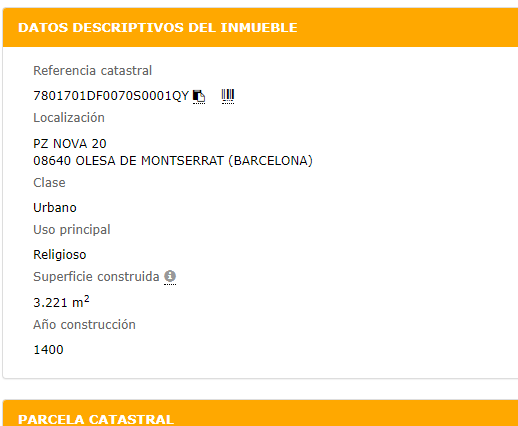

Ahora supongamos que queremos determinar el uso principal de este inmueble, para ellos buscamos 

In [21]:
xpath = "//*[./span/text()='Referencia catastral']//label"
etiqs = driver.find_element(By.XPATH,xpath)
print(etiqs.text)
xpath = "//*[./span/text()='Uso principal']//label"
etiqs = driver.find_element(By.XPATH,xpath)
print(etiqs.text)

7801701DF0070S0001QY    
Religioso


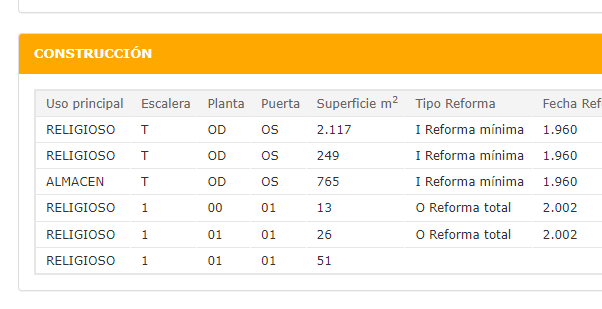

### Otras pruebas

Texto de la p�gina

In [7]:
html = driver.find_element(By.XPATH,"/html")
print(html.text)

Formulario master
Castellano
ICONO CORREO ELECTR�NICO
CONT�CTENOS
Icono p�gina de inicio
Consulta y certificaci�n de Bien Inmueble
Volver
CARTOGRAF�A
CONSULTA DESCRIPTIVA Y GR�FICA
IMPRIMIR DATOS
VISOR 3D
DATOS DESCRIPTIVOS DEL INMUEBLE
Referencia catastral
7801701DF0070S0001QY    
Localizaci�n
PZ NOVA 20
08640 OLESA DE MONTSERRAT (BARCELONA)
Clase
Urbano
Uso principal
Religioso
Superficie construida
3.221 m2
A�o construcci�n
1400
PARCELA CATASTRAL

Parcela construida sin divisi�n horizontal
Localizaci�n
PZ NOVA 20
OLESA DE MONTSERRAT (BARCELONA)
Superficie gr�fica
1.884 m2
CONSTRUCCI�N
Uso principal Escalera Planta Puerta Superficie m2 Tipo Reforma Fecha Reforma
RELIGIOSO T OD OS 2.117 I Reforma m�nima 1.960
RELIGIOSO T OD OS 249 I Reforma m�nima 1.960
ALMACEN T OD OS 765 I Reforma m�nima 1.960
RELIGIOSO 1 00 01 13 O Reforma total 2.002
RELIGIOSO 1 01 01 26 O Reforma total 2.002
RELIGIOSO 1 01 01 51
�C�mo se pueden obtener datos protegidos (titularidad y valor catastral) de los inmueb

Caminos absolutos

In [8]:
head = driver.find_element(By.XPATH,"/html/head")
body = driver.find_element(By.XPATH,"/html/body")
html2 = body.find_element(By.XPATH,"/html")

Hijos de un elemento

In [9]:
hijos = driver.find_elements(By.XPATH,"/html/body/*")
for element in hijos:
    print(element.tag_name)

div
div
form
div
script
a
script
link
script
script
script


Camino relativo

In [10]:
divs = driver.find_elements(By.XPATH,"/html/body/*/div")
print(len(divs))

3


In [11]:
divs = body.find_elements(By.XPATH,"./*/div")
print(len(divs))

3


Saltar pasos intermedios

In [12]:
divs = driver.find_elements(By.XPATH,"/html/body//div")
print(len(divs))

155


In [13]:
labels = driver.find_elements(By.XPATH,"//label")
print(len(labels))

19


Insertar texto

In [14]:
id = "ctl00_Contenido_tblInmueble"
div = driver.find_element(By.ID,id)
label = div.find_element(By.XPATH,"//label")
print(label.text)

7801701DF0070S0001QY    


In [15]:
xpath = "//*[./span/text()='Referencia catastral']//label"
etiqs = driver.find_element(By.XPATH,xpath)
print(etiqs.text)

7801701DF0070S0001QY    


In [16]:
clase = driver.find_elements(By.XPATH,"(//label)[position()=3]")
print(clase[0].text)

etiqs = driver.find_elements(By.XPATH,"//label")
print(etiqs[2].text)

ulti = driver.find_elements(By.XPATH,"(//label)[last()]")
print(ulti[0].text)


In [17]:
driver.close()

Por Rafael Caballero. Del libro "Big data con Python". Gracias a Jos� Ram�n Guerra por las actualizaciones